In [3]:
#general definitions and imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext itikz

import schemdraw
import schemdraw.elements as elm


The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


Eurorack synthesizers need a linear bipolar power supply. In order not to have to work with mains voltage, a wall-wart adapter is used for power input. This power supply will provide +-15V/1A and 5V/1A. The current for +-15V is split, there is 500mA available on each rail. For the bipolar source, a 15V AC adapter is needed. The 5V source is generated by a 12V DC adapter. The circuit is largely from the MFOS Wall Wart Power Supply by Ray Wilson.

# about

The circuit is very simple. The 15AC input is half bridge rectified. The positive half is providing the +15V, the negative the -15V. The capacitors remove the ripple and the regulators provide a clean DC voltage. The 5V regulator circuit is taken directly from the datasheet. The 5V should not be used for audio circuits. It is meant to drive LED's and as input for regulators providing the power for a microchip. 

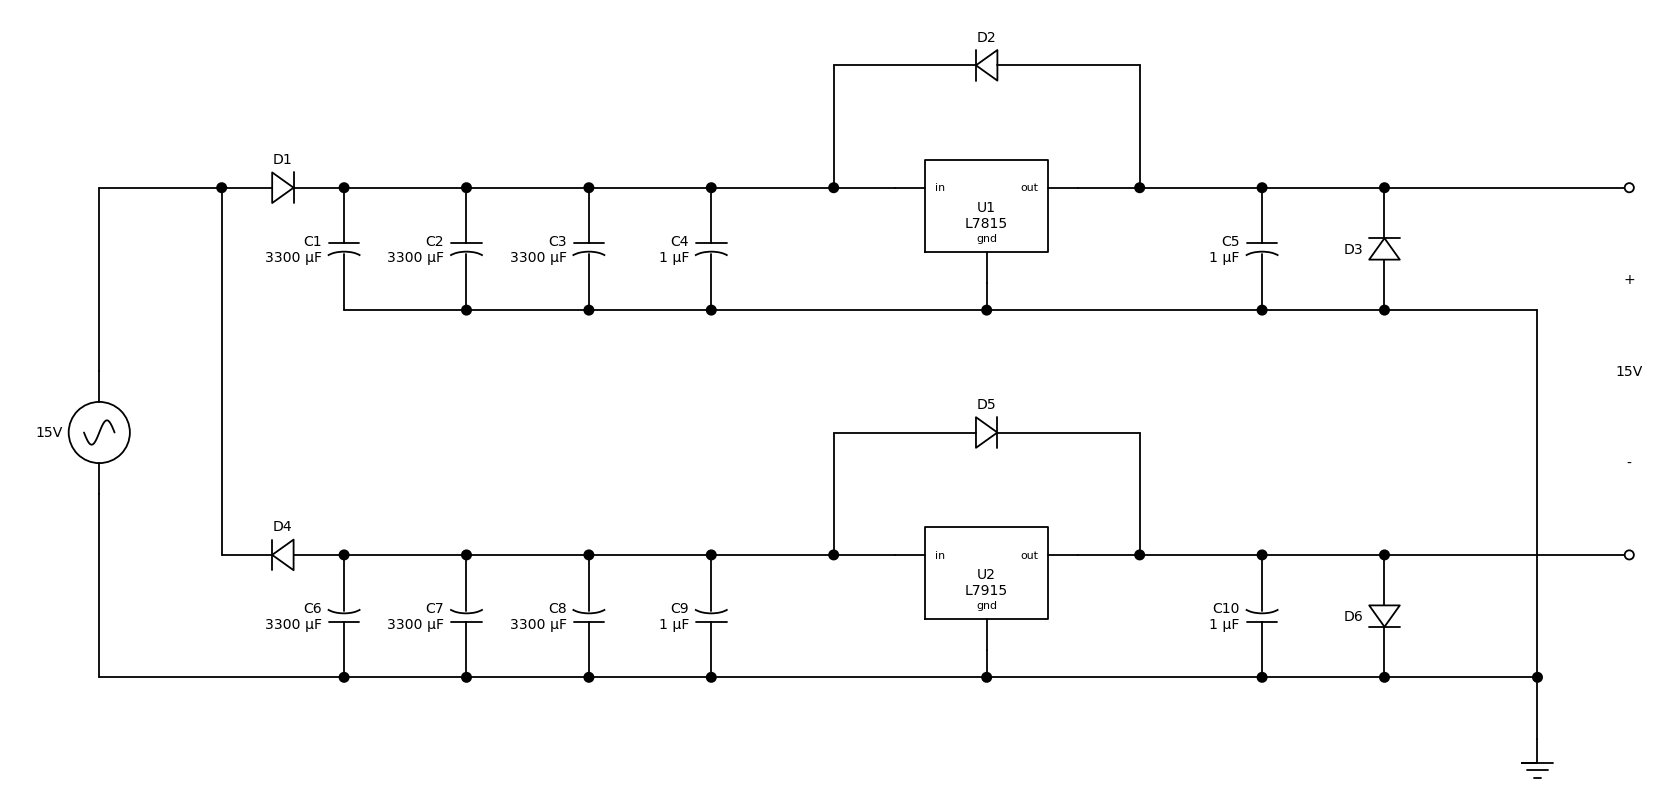

In [122]:
d = schemdraw.Drawing(unit=2, inches_per_unit=0.6, lw=1.8)
#d.add(elm.Dot('left', lftlabel='IN', open=True))
#d.add(elm.Line(l=d.unit/4))
d += ( VS := elm.SourceSin().up().label("15V") )
d += elm.Line().length(d.unit*1.5)

#positive regulator
d += (Lin := elm.Line("right").length(d.unit))
d += elm.Dot()
d += ( L1 := elm.Diode().label("D1") )

#d += (L1 := elm.Line("right").length(d.unit/2))
d += elm.Dot()
d += (L2 := elm.Line("right"))
d += elm.Dot()
d += (L3 := elm.Line("right"))
d += elm.Dot()
d += (L4 := elm.Line("right"))
d += elm.Dot()
d += (L5 := elm.Line("right").length(d.unit))
d += elm.Dot()
d += (elm.Line("right").length(d.unit/2))
d += ( Vreg1 := elm.VoltageRegulator().anchor("in") ).label('U1\nL7815')

d += (L6 := elm.Line().right().at(Vreg1.out).length(d.unit/2))
d += elm.Dot()
d += (L7 := elm.Line())
d += elm.Dot()
d += (L8 := elm.Line())
d += elm.Dot()
d += (L9 := elm.Line().length(d.unit*2))
d += elm.Dot(open=True)

d += (elm.Line().up().at(L5.end))
d += elm.Diode().right().tox(L6.end).reverse().label('D2')
d += elm.Line().down()

d += ( Cpos := elm.Capacitor2().down().at(L1.end).label('C1\n3300 μF') )
d += elm.Capacitor2().down().at(L2.end).label('C2\n3300 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L3.end).label('C3\n3300 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L4.end).label('C4\n1 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L7.end).label('C5\n1 μF')
d += elm.Dot()
d += elm.Diode().down().at(L8.end).reverse().label('D3')
d += elm.Dot()

d += ( GndPos1 := elm.Line().at(Cpos.end).right().tox(Vreg1.gnd) )
d += elm.Dot()
d += ( GndPos2 := elm.Line().right().length(d.unit*4.5) )
d += elm.Line("up").at(GndPos1.end).toy(Vreg1.gnd)

#negative regulator
d += elm.Line().length(d.unit).down().at(Lin.end).length(d.unit*3)
d += ( L1 := elm.Diode().right().reverse().label("D4") )

d += elm.Dot()
d += (L2 := elm.Line("right"))
d += elm.Dot()
d += (L3 := elm.Line("right"))
d += elm.Dot()
d += (L4 := elm.Line("right"))
d += elm.Dot()
d += (L5 := elm.Line("right").length(d.unit))
d += elm.Dot()
d += (elm.Line("right").length(d.unit/2))
d += ( Vreg1 := elm.VoltageRegulator().anchor("in") ).label('U2\nL7915')

d += (L6 := elm.Line().right().at(Vreg1.out).length(d.unit/2))
d += elm.Dot()
d += (L7 := elm.Line())
d += elm.Dot()
d += (L8 := elm.Line())
d += elm.Dot()
d += (L10 := elm.Line().length(d.unit*2))
d += elm.Dot(open=True)

d += (elm.Line().up().at(L5.end))
d += elm.Diode().right().tox(L6.end).label('D5')
d += elm.Line().down()

d += ( Cneg := elm.Capacitor2().down().at(L1.end).reverse().label('C6\n3300 μF') )
d += elm.Dot()
d += elm.Capacitor2().down().at(L2.end).reverse().label('C7\n3300 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L3.end).reverse().label('C8\n3300 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L4.end).reverse().label('C9\n1 μF')
d += elm.Dot()
d += elm.Capacitor2().down().at(L7.end).reverse().label('C10\n1 μF')
d += elm.Dot()
d += elm.Diode().down().at(L8.end).label('D6')
d += elm.Dot()

#Ground 
d += ( GndNeg1 := elm.Line().at(VS.start).down().toy(Cneg.end) )
d += ( GndNeg2 := elm.Line().right().tox(Vreg1.gnd) )
d += elm.Dot()
d += ( GndNeg3 := elm.Line().right().length(d.unit*4.5) )
d += elm.Dot()
d += elm.Line().down().length(d.unit/2)
d += elm.Ground()

d += elm.Line().down().at(GndPos2.end).toy(GndNeg3.end)
d += elm.Gap().down().at(L9.end).toy(L10.end).label(['+','15V','-'])

d += elm.Line("up").at(GndNeg2.end).toy(Vreg1.gnd)

d.draw()

In [ ]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}[scale=3]

\fontsize{0.4cm}{0.4cm}\selectfont \sffamily
\draw[black,thick] (0,0) -- (0,20.32mm) -- 
			  		 (8.7mm,20.32mm) -- (8.7mm,0) -- (0,0);
\draw[black,thick] (1.16mm,1.16mm) -- (1.16mm,19.16mm) -- 
			  		 (7.54mm,19.16mm) -- (7.54mm,1.16mm) -- (1.16mm,1.16mm);
\draw[black,thick, fill = white] (0mm,7.91mm) -- (0mm,12.41mm) [black] -- 
			  		  (1.16mm,12.41mm) -- (1.16mm,7.91mm) -- (0mm,7.91mm);

\foreach \x in {0mm,2.54mm}
	\foreach \y in {0mm,-2.54mm,...,-10.16mm}
		\draw[xshift=\x, yshift=\y,black] (3.08mm,15.24mm) circle [radius=0.32mm];

\draw (12mm,15.24mm) [align = left] node {-15V};
\draw (12mm,12.7mm)  [align = left] node {+15V};
\draw (12mm,10.16mm)  [align = left] node {GND};
\draw (12mm,7.62mm)  [align = left] node {GND};
\draw (12mm,5.08mm)  [align = left] node {+5V};

\end{tikzpicture}
\end{document}

Ribbon cables and IDC connectors are used to connect the modules. The IDC connectors are 10 pins in 2 rows and a spacing of 2.54mm. The pin configuration does not follow any standard. It is not possible to connect any other module to this power supply. 

# construction

In [ ]:
from IPython.core.display import display, HTML
display(HTML('''
<div class="hero is-fullheight mb-4 schema" style="background: url('{{ '/assets/IMG20210606130031.jpg' | relative_url }}') no-repeat center center; background-size: cover; background-attachment: fixed;">
   <div class="hero-body is-fullheight">
        <div class="content">
        </div>
    </div>
</div>
'''))


{% include bom.html %}

There are also two wall-wart adapters needed. One must be [15V/AC](https://www.mascot.no/media/2444/8710-tech-spec_.pdf), the other 12V/DC. Both adapters must have one Ampere capacity.

{% include callouts.html %}
{% include reports.html %}

In [ ]:
from IPython.core.display import display, HTML
display(HTML('''
<div class="hero is-fullheight mb-4 schema" style="background: url('{{ '/assets/kraft-panel.jpg' | relative_url }}') no-repeat center center; background-size: cover; background-attachment: fixed;">
   <div class="hero-body is-fullheight">
        <div class="content">
        </div>
    </div>
</div>
'''))


# usage

Plugin the Wall-Wart connectors to the kraft barrel sockets. Be careful and don't mix the inputs up, both connectors have the same size. The modules are connected with ribbon cables, use one socket per module. 

# references

- [MFOS](http://musicfromouterspace.com/analogsynth_new/WALLWARTSUPPLY/WALLWARTSUPPLY.php) Wall Wart Power Supply (+/-9V to +/-15V)
